In [161]:
from velocity_field          import VelocityField
from plots                   import spiral_v_contours_plot
from rakifov_wake            import RafikovWake
from copy                    import deepcopy
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid

import matplotlib.pylab as plt
import numpy            as np

# Figure 3

In [97]:
wf0 = VelocityField(type="wakeflow",     name="bigdisk_nolin/3.0Mj")
wfT = VelocityField(type="wakeflow",     name="bigdisk_nolin/3.0Mj_total")

pos_angle = 45
planet_az = 55
inclination = -225


rot_wf0 = deepcopy(wf0)
rot_wf0.rotate(PA=pos_angle, planet_az=planet_az, inc=inclination, grid_rotate=False)

Constructing VelocityField object of type wakeflow using bigdisk_nolin/3.0Mj
Constructing VelocityField object of type wakeflow using bigdisk_nolin/3.0Mj_total
Rotating velocity field
edge height =  87.8158759280985


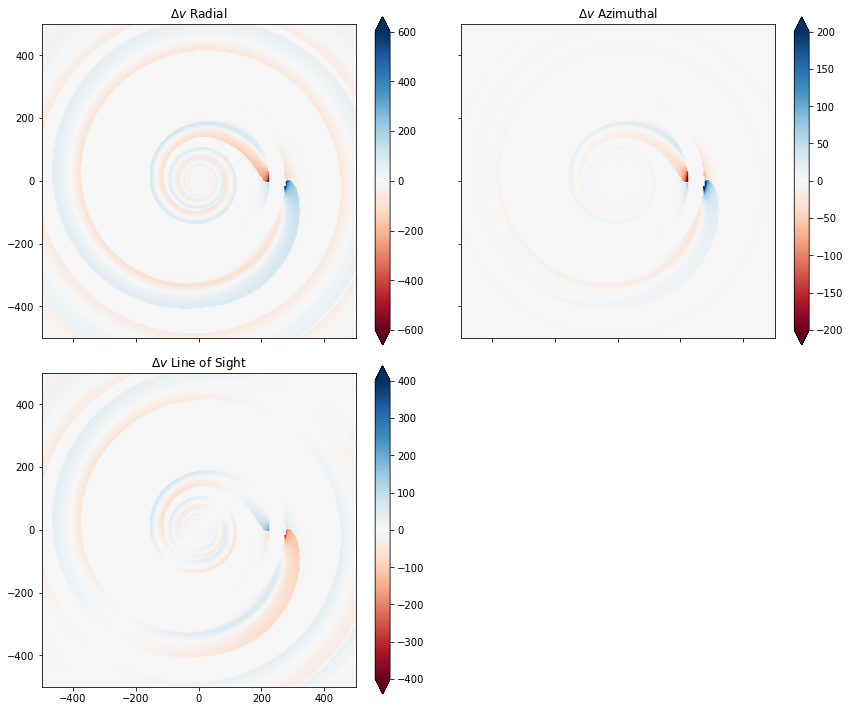

In [137]:
fig, ax = plt.subplots(2, 2, 
                       sharex=True, sharey=True, 
                       gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]}, 
                       figsize=[12,10])

fig.tight_layout()

extent = (-1000,1000,-1000,1000)

# all subplots
for i in range(2):
    for j in range(2):
        ax[i,j].axis('scaled')
        ax[i,j].set_xlim(-500, 500)
        ax[i,j].set_ylim(-500, 500)

# plot v_r component
c1 = ax[0,0].imshow(np.flipud(1e3*wf0.v_r.transpose()), cmap='RdBu', extent=extent, vmin=-600, vmax=600)

# plot v_phi component
c2 = ax[0,1].imshow(np.flipud(1e3*wf0.v_phi.transpose()), cmap='RdBu', extent=extent, vmin=-200, vmax=200)

# plot v_LOS component
c3 = ax[1,0].imshow(np.flipud(rot_wf0.v_field[2,:,:].transpose()), cmap='RdBu', extent=extent, vmin=-400, vmax=400)

# hide last axes
ax[1,1].axis('off')

# titles
ax[0,0].set_title(r'$\Delta v$ Radial')
ax[0,1].set_title(r'$\Delta v$ Azimuthal')
ax[1,0].set_title(r'$\Delta v$ Line of Sight')

# colorbars
plt.colorbar(c1, ax=ax[0,0], extend='both')
plt.colorbar(c2, ax=ax[0,1], extend='both')
plt.colorbar(c3, ax=ax[1,0], extend='both')

#plt.savefig('components.pdf', bbox_inches='tight')
plt.show()

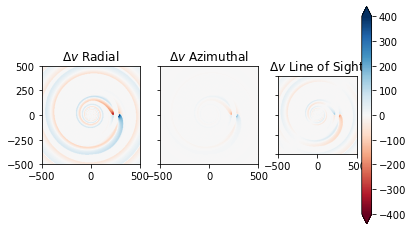

In [166]:
fig, ax = plt.subplots(1, 3, 
                       sharex=True, sharey=True, 
                       gridspec_kw={'width_ratios': [1, 1, 1]},
                       figsize=[15,4.5]
)

#fig.tight_layout()

extent = (-1000,1000,-1000,1000)

lim = 400

# all subplots
for i in range(3):
    ax[i].axis('scaled')
    ax[i].set_xlim(-500, 500)
    ax[i].set_ylim(-500, 500)

# plot v_r component
c1 = ax[0].imshow(np.flipud(1e3*wf0.v_r.transpose()), cmap='RdBu', extent=extent, vmin=-lim, vmax=lim)

# plot v_phi component
c2 = ax[1].imshow(np.flipud(1e3*wf0.v_phi.transpose()), cmap='RdBu', extent=extent, vmin=-lim, vmax=lim)

# plot v_LOS component
c3 = ax[2].imshow(np.flipud(rot_wf0.v_field[2,:,:].transpose()), cmap='RdBu', extent=extent, vmin=-lim, vmax=lim)

# titles
ax[0].set_title(r'$\Delta v$ Radial')
ax[1].set_title(r'$\Delta v$ Azimuthal')
ax[2].set_title(r'$\Delta v$ Line of Sight')

# colorbar
plt.colorbar(c3, ax=ax[2], extend='both')

plt.savefig('components.pdf', bbox_inches='tight')
plt.show()

<ipython-input-164-060158aa42fa>:28: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(im)


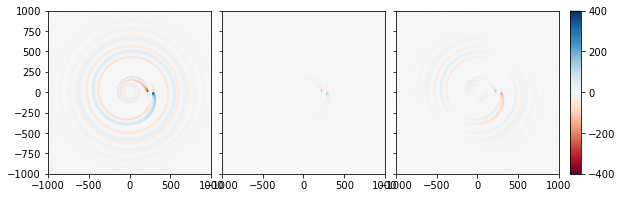

In [164]:
fig = plt.figure(figsize=(9.75, 3))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

data = [
    np.flipud(1e3*wf0.v_r.transpose()),
    np.flipud(1e3*wf0.v_phi.transpose()),
    np.flipud(rot_wf0.v_field[2,:,:].transpose())
]

extent = (-1000,1000,-1000,1000)

lim = 400

# Add data to image grid
for i, ax in enumerate(grid):
    im = ax.imshow(data[i], vmin=-lim, vmax=lim, cmap='RdBu', extent=extent)

# Colorbar
ax.cax.colorbar(im)
ax.cax.toggle_label(True)

#plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
plt.show()